In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torchvision import datasets, transforms, models
from PIL import Image
import os 

#pepper Classification on Unseen Image


# Load saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000) # this is adjusted to match the original model output unit
model.load_state_dict(torch.load('../models/pepper_classification.pth'))
model.eval

#Create a new model with the correct final layer
new_Model = models.resnet18(pretrained=True)
new_Model.fc = nn.Linear(new_Model.fc.in_features, 2) #adjusted based on my classes -->2


# copy the weights and biasse from the loaded model to the new model
new_Model.fc.weight.data = model.fc.weight.data[0:2] # Copy only the first output units
new_Model.fc.bias.data=model.fc.bias.data[0:2] 


#Load and preprocess the unseen image follow the same data transformations used during the training process
image_path = 'test11.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(225),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
      
])

input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0) # Add a batch dimension

# perform inferance
with torch.no_grad():
    output = model(input_batch)
    
#Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['bell', 'chilli'] # here is the training class
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

c:\Users\adegb\miniconda3\envs\ML-WK\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\adegb\miniconda3\envs\ML-WK\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


The predicted class is: bell


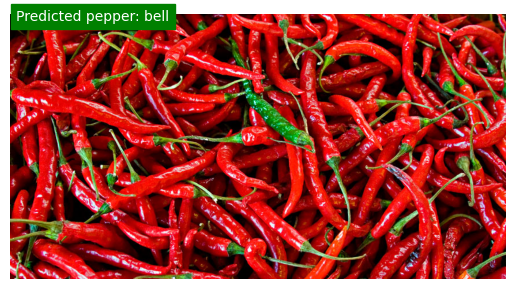

In [2]:
# To visualise the predicted image

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10,12, f'Predicted pepper: {predicted_class_name}', color='white', backgroundcolor='green')
plt.show()